## Kodas mokymosi duomenų paruošimui
#### Užduotys:
- pervadinti failus
- išrūšiuoti failus į katalogus (train, test data)
- sumažinti paveikslėlių dydį (opt. galima ir užkraudinėjant duomenis)

In [16]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import random
from sklearn.model_selection import train_test_split

In [2]:
DATADIRS = [r'C:\Users\daimzn\Asmeniniai\Schemos\Ne_schemos', r'C:\Users\daimzn\Asmeniniai\Schemos\Schemos']
TEST_DIR = r'C:\Users\daimzn\Asmeniniai\Schemos\Demo'
IMG_SIZE = 500

# išrenkam atsitiktinius pav. demonstracijai
for data_dir in DATADIRS:
    files_to_copy = 37
    dir_name = os.path.basename(data_dir)
    test_dir_path = os.path.join(TEST_DIR, dir_name)
    if not os.path.isdir(test_dir_path):
        os.mkdir(test_dir_path)
    files = os.listdir(data_dir)
    while files_to_copy > 0:
        rand_file = files[random.randint(0, len(files)-1)]
        shutil.move(os.path.join(data_dir, rand_file), os.path.join(test_dir_path, rand_file))
        files.remove(rand_file)
        files_to_copy -= 1

In [3]:
# užkraunam duomenis
training_data = []
classes = []
for data_dir in DATADIRS:
    files = os.listdir(data_dir)
    class_number = DATADIRS.index(data_dir)
#     files.sort(key=lambda file: os.stat(os.path.join(data_dir, file)).st_size)
    for file in files:
        img_path = os.path.join(data_dir, file)
        try:            
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            training_data.append(img)
            classes.append(class_number)
        except Exception as e:
            print(img_path, str(e))

C:\Users\daimzn\Asmeniniai\Schemos\Schemos\Perbraukimas yra triukšmas, geriau, kad nebūtų.png OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

C:\Users\daimzn\Asmeniniai\Schemos\Schemos\Schemos dydis netinkamas, OCR sunkiai skaito, tikrai nereikia tokio didelio rėmelio.png OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [17]:
# pasigaminame testavimo duomenų
X_train, X_test, y_train, y_test = train_test_split(training_data, classes, test_size=0.1, shuffle= True)

In [33]:
# sukuriamas tuple objektas duomenų išsaugojimui
all_training_data = ((X_train, y_train), (X_test, y_test))

In [34]:
# išsaugomi duomenys
import pickle
with open('images_data.pickle', 'wb') as f:
    pickle.dump(all_training_data, f)

0


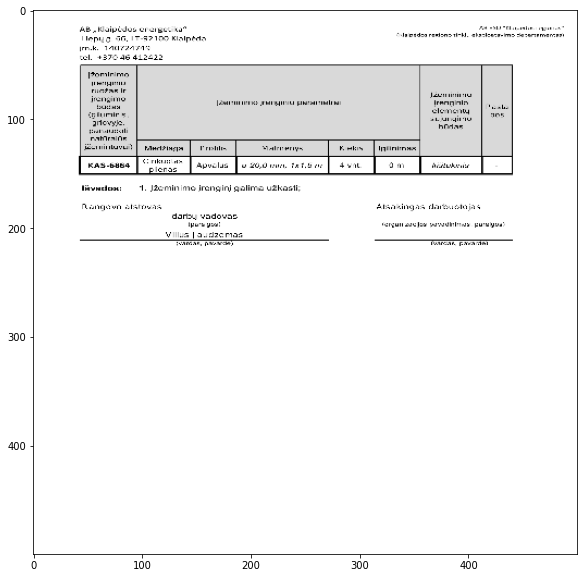

In [23]:
i = 34
print(y_test[i])
plt.imshow(X_test[i])
plt.show()

In [31]:
classes.count(1)

3098